#Referências

https://www.scielosp.org/pdf/rsp/2011.v45n2/432-435

https://www.riuni.unisul.br/bitstream/handle/12345/5373/Rafael%20Martins%20TCC%20PDFA.pdf?sequence=1&isAllowed=y

http://www.abergo.org.br/revista/index.php/ae/article/view/721/302

http://bdm.unb.br/bitstream/10483/1601/1/2009_StefanSanti.pdf

http://repositorio.unb.br/bitstream/10482/20533/1/2016_RafaelMedeirosHespanhol.pdf

https://pt.wikipedia.org/wiki/Testes_de_hip%C3%B3teses

# Análise dos dados de condições meteorológicas e ocorrências aeronáuticas

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from math import radians, cos, sin, asin, sqrt 

%matplotlib inline

In [0]:
df_ocorrencias = pd.read_csv('gdrive/My Drive/projetos/lp/oco.csv', sep='~', header=0,\
         usecols=['codigo_ocorrencia','ocorrencia_classificacao', 'ocorrencia_tipo', 'ocorrencia_uf',\
                 'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_horario', 'ocorrencia_dia'])

print(df_ocorrencias.head(5))
print(df_ocorrencias.shape)

   codigo_ocorrencia ocorrencia_classificacao  ... ocorrencia_dia  ocorrencia_horario
0    201305055424986                 ACIDENTE  ...     2013-05-05            11:00:00
1    201805021421302                INCIDENTE  ...     2018-03-09            22:40:00
2    201605160250139          INCIDENTE GRAVE  ...     2016-05-13            19:19:00
3    201311259977425          INCIDENTE GRAVE  ...     2013-11-25            12:32:00
4    200808073991179                 ACIDENTE  ...     2008-08-07            15:10:00

[5 rows x 8 columns]
(5733, 8)


In [0]:
df_ocorrencias_sudeste = df_ocorrencias.loc[df_ocorrencias['ocorrencia_uf'].isin(['ES','MG','RJ','SP'])]

print(df_ocorrencias_sudeste.head(5))
print(df_ocorrencias_sudeste.shape)

    codigo_ocorrencia  ... ocorrencia_horario
21    201609131430542  ...           14:10:00
22    201212272090341  ...           16:03:00
23    200906128607729  ...           14:50:00
24    201408227604299  ...           14:30:00
25    200801159627220  ...           11:41:00

[5 rows x 8 columns]
(2536, 8)


In [0]:
df_fatores_contribuintes = pd.read_csv('gdrive/My Drive/projetos/lp/ftc.csv', sep='~', header=0,\
        usecols=['codigo_ocorrencia', 'fator_nome'])

print(df_fatores_contribuintes.head(5))
print(df_fatores_contribuintes.shape)

   codigo_ocorrencia               fator_nome
0    200801041545367      INDISCIPLINA DE VOO
1    200801041545367                INSTRUÇÃO
2    200801041545367   MANUTENÇÃO DE AERONAVE
3    200801041545367              OUTRO FATOR
4    200801058203864  JULGAMENTO DE PILOTAGEM
(4800, 2)


In [0]:
df_aeronaves_envolvidas = pd.read_csv('gdrive/My Drive/projetos/lp/anv.csv', sep='~', header=0,\
        usecols=['codigo_ocorrencia', 'aeronave_tipo_veiculo', 'aeronave_fabricante',\
                'aeronave_modelo', 'aeronave_motor_tipo', 'aeronave_motor_quantidade',\
                        'aeronave_ano_fabricacao', 'aeronave_tipo_operacao', 'total_fatalidades'])

print(df_aeronaves_envolvidas.head(5))
print(df_aeronaves_envolvidas.shape)

   codigo_ocorrencia  ... total_fatalidades
0    201106142171203  ...                 0
1    200804256669287  ...                 0
2    201205209591320  ...                 0
3    201012015549851  ...                 0
4    201708190325167  ...                 0

[5 rows x 9 columns]
(5794, 9)


In [0]:
df_ocorrencias_fatores_sudeste = pd.merge(df_ocorrencias_sudeste, df_fatores_contribuintes, on='codigo_ocorrencia', how='inner')

print(df_ocorrencias_fatores_sudeste.head(5))
print(df_ocorrencias_fatores_sudeste.shape)

   codigo_ocorrencia  ...                         fator_nome
0    200801159627220  ...                            ATITUDE
1    200801159627220  ...       CULTURA DO GRUPO DE TRABALHO
2    200801159627220  ...          CARACTERÍSTICAS DA TAREFA
3    200801159627220  ...  CONDIÇÕES METEOROLÓGICAS ADVERSAS
4    200801159627220  ...                   PESSOAL DE APOIO

[5 rows x 9 columns]
(1300, 9)


In [0]:
df_ocorrencias_cond_met_sudeste = df_ocorrencias_fatores_sudeste.loc[df_ocorrencias_fatores_sudeste['fator_nome'].isin(['CONDIÇÕES METEOROLÓGICAS ADVERSAS'])]

print(df_ocorrencias_cond_met_sudeste.head(5))
print(df_ocorrencias_cond_met_sudeste.shape)

    codigo_ocorrencia  ...                         fator_nome
3     200801159627220  ...  CONDIÇÕES METEOROLÓGICAS ADVERSAS
6     201207125348634  ...  CONDIÇÕES METEOROLÓGICAS ADVERSAS
46    200802265376981  ...  CONDIÇÕES METEOROLÓGICAS ADVERSAS
74    201311205508363  ...  CONDIÇÕES METEOROLÓGICAS ADVERSAS
92    200905142478810  ...  CONDIÇÕES METEOROLÓGICAS ADVERSAS

[5 rows x 9 columns]
(41, 9)


In [0]:
df_ocorrencias_cond_met_aeronaves_sudeste = pd.merge(df_ocorrencias_cond_met_sudeste, df_aeronaves_envolvidas, on='codigo_ocorrencia', how='inner')

print(df_ocorrencias_cond_met_aeronaves_sudeste.head(5))
print(df_ocorrencias_cond_met_aeronaves_sudeste.shape)

   codigo_ocorrencia  ... total_fatalidades
0    200801159627220  ...                 0
1    201207125348634  ...                 3
2    200802265376981  ...                 5
3    201311205508363  ...                 1
4    200905142478810  ...                 0

[5 rows x 17 columns]
(41, 17)


In [0]:
df_ocorrencias_cond_met_aeronaves_sudeste.to_csv ('gdrive/My Drive/projetos/lp/ocorrencias_cond_met_aeronaves_sudeste.csv', index = None, header=True)

In [0]:
df_met_sudeste = pd.read_csv('gdrive/My Drive/projetos/lp/sudeste.csv', sep=',', header=0,\
         usecols=['wsid','wsnm', 'elvt', 'lat', 'lon', 'city', 'prov', 'mdct', 'date',
         'yr', 'mo', 'da', 'hr', 'stp', 'gbrd', 'temp', 'hmdy', 'wdsp', 'wdct', 'gust'])

print(df_met_sudeste.head(5))
print(df_met_sudeste.shape)

   wsid         wsnm   elvt       lat        lon  ...  temp  hmdy wdsp   wdct  gust
0   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  ...  29.3  35.0  3.2  101.0   6.5
1   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  ...  29.0  39.0  3.6   94.0   6.4
2   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  ...  27.4  44.0  2.5   93.0   6.9
3   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  ...  25.8  58.0  1.7   96.0   5.8
4   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  ...  25.4  57.0  3.1  110.0   7.5

[5 rows x 20 columns]
(9779168, 20)


In [0]:
df_ocorrencias_cond_met_aeronaves_sudeste.rename(columns={'ocorrencia_dia': 'date'}, inplace=True)
df_ocorrencias_cond_met_aeronaves_sudeste.rename(columns={'ocorrencia_uf': 'prov'}, inplace=True)

df_ocorrencias_cond_met_aeronaves_sudeste['tmp'] = 1
df_met_sudeste['tmp'] = 1

tabelao = pd.merge(df_ocorrencias_cond_met_aeronaves_sudeste, df_met_sudeste, on=['tmp', 'date', 'prov'])
tabelao = tabelao.drop('tmp', axis=1)


print(tabelao.head(5))
print(tabelao.shape)

tabelao.to_csv ('gdrive/My Drive/projetos/lp/tabelao.csv', index = None, header=True)

   codigo_ocorrencia ocorrencia_classificacao ocorrencia_tipo  ...  wdsp  wdct gust
0    200801159627220                 ACIDENTE          OUTROS  ...   0.0   0.0  0.0
1    200801159627220                 ACIDENTE          OUTROS  ...   0.0   0.0  0.0
2    200801159627220                 ACIDENTE          OUTROS  ...   0.0   0.0  0.0
3    200801159627220                 ACIDENTE          OUTROS  ...   0.0   0.0  0.0
4    200801159627220                 ACIDENTE          OUTROS  ...   0.0   0.0  0.0

[5 rows x 35 columns]
(29856, 35)


In [0]:
def haversine(row):
    # Raio da Terra em Km
    r = 6371
    # Converte coordenadas de graus para radianos

    lat1, lon1, lat2, lon2 = map(radians, [row['ocorrencia_latitude'], row['ocorrencia_longitude'],\
            row['lat'], row['lon']])

    # Formula de Haversine
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    hav = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    d = 2 * r * asin( sqrt(hav) )
    idwsid = 0
    if (d <= 110):
        idwsid = 1
    return idwsid

def haversine_valor(row):
    # Raio da Terra em Km
    r = 6371
    # Converte coordenadas de graus para radianos

    lat1, lon1, lat2, lon2 = map(radians, [row['ocorrencia_latitude'], row['ocorrencia_longitude'],\
            row['lat'], row['lon']])

    # Formula de Haversine
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    hav = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    d = 2 * r * asin( sqrt(hav) )
    return d

def cruzar_horas(row):
    condicao = 0
    if (row['ocorrencia_horario_hr'] == row['mdct_hr']):
        condicao = 1
    return condicao
    

tabelao['ocorrencia_horario'] = pd.to_datetime(tabelao['ocorrencia_horario'])
tabelao['ocorrencia_horario_hr'] = tabelao['ocorrencia_horario'].map(lambda x: x.strftime('%H'))    


tabelao['mdct'] = pd.to_datetime(tabelao['mdct'])
tabelao['mdct_hr'] = tabelao['mdct'].map(lambda x: x.strftime('%H'))    
      
tabelao['ocorrencia_estacao'] = tabelao.apply(haversine, axis=1)

tabelao['ocorrencia_estacao_hora'] = tabelao.apply(cruzar_horas, axis=1)

tabelao_110km = tabelao.loc[((tabelao['ocorrencia_estacao']) > 0) & ((tabelao['ocorrencia_estacao_hora']) > 0)]

tabelao_110km['ocorrencia_estacao_distancia'] = tabelao_110km.apply(haversine_valor, axis=1)

tabelao_110km_uni = tabelao_110km.groupby(['codigo_ocorrencia'])['ocorrencia_estacao_distancia'].min()

tabelao_40 = pd.merge(tabelao_110km, tabelao_110km_uni, on=['ocorrencia_estacao_distancia']).drop_duplicates()

print(tabelao_40.shape)

print(tabelao_40['codigo_ocorrencia'].value_counts())

tabelao_40.to_csv ('gdrive/My Drive/projetos/lp/tabelao_40.csv', index = None, header=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(39, 40)
201012091012069    1
201206022037551    1
201101308909677    1
201101012554670    1
201002264597949    1
201007243412590    1
200801235808261    1
201204268107243    1
200906134111359    1
200804303594333    1
201109104280788    1
201207286338230    1
201109096211708    1
200905142478810    1
200802265376981    1
200801159627220    1
200901179589815    1
201202075853502    1
200802236257231    1
201108309734742    1
200909218862179    1
201110011567899    1
201111153377811    1
200908213725671    1
201110163307115    1
200804195711783    1
200812308352487    1
200909036780777    1
201002174449839    1
200801112101167    1
201602261542222    1
201502197258957    1
201211115599083    1
201408136355580    1
200905252360628    1
201407052477200    1
201302039792556    1
201207125348634    1
201311205508363    1
Name: codigo_ocorrencia, dtype: int64


In [0]:
from folium import plugins
coordenadas = []

lat = tabelao_40['lat'][:500].values
long = tabelao_40['lon'][:500].values

lat_oco = tabelao_40['ocorrencia_latitude'][:500].values
long_oco = tabelao_40['ocorrencia_longitude'][:500].values

mapa = folium.Map(location=[-23.5489,-46.6388],tiles='OpenStreetMap',zoom_start=5)

for la,lo in zip(lat,long):
    folium.Marker([la, lo]).add_to(mapa)
for la,lo in zip(lat_oco, long_oco):
    coordenadas.append([la,lo])



mapa.add_child(plugins.HeatMap(coordenadas))
mapa

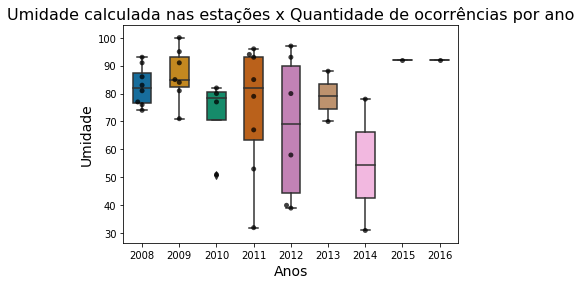

In [0]:
# plot boxplot with seaborn
bplot=sns.boxplot(y='hmdy', x='yr', 
                 data=tabelao_40, 
                 width=0.5,
                 palette="colorblind")
 
# add swarmplot
bplot=sns.swarmplot(y='hmdy', x='yr',
              data=tabelao_40, 
              color='black',
              alpha=0.75)

bplot.axes.set_title("Umidade calculada nas estações x Quantidade de ocorrências por ano",
                    fontsize=16)
 
bplot.set_xlabel("Anos", 
                fontsize=14)
 
bplot.set_ylabel("Umidade",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

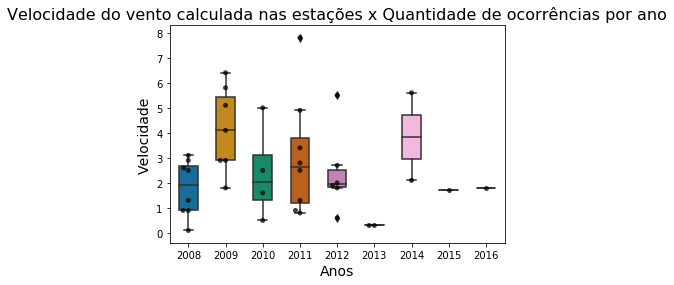

In [0]:
# plot boxplot with seaborn
bplot=sns.boxplot(y='wdsp', x='yr', 
                 data=tabelao_40, 
                 width=0.5,
                 palette="colorblind")
 
# add swarmplot
bplot=sns.swarmplot(y='wdsp', x='yr',
              data=tabelao_40, 
              color='black',
              alpha=0.75)

bplot.axes.set_title("Velocidade do vento calculada nas estações x Quantidade de ocorrências por ano",
                    fontsize=16)
 
bplot.set_xlabel("Anos", 
                fontsize=14)
 
bplot.set_ylabel("Velocidade",
                fontsize=14)
 
bplot.tick_params(labelsize=10)


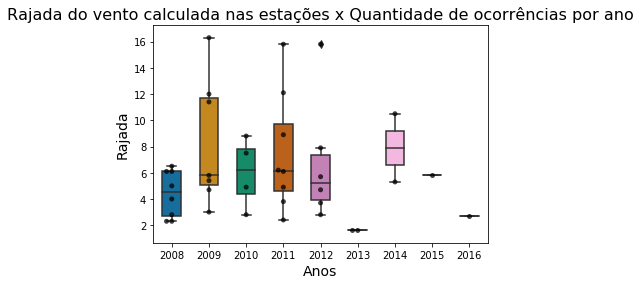

In [0]:
# plot boxplot with seaborn
bplot=sns.boxplot(y='gust', x='yr', 
                 data=tabelao_40, 
                 width=0.5,
                 palette="colorblind")
 
# add swarmplot
bplot=sns.swarmplot(y='gust', x='yr',
              data=tabelao_40, 
              color='black',
              alpha=0.75)

bplot.axes.set_title("Rajada do vento calculada nas estações x Quantidade de ocorrências por ano",
                    fontsize=16)
 
bplot.set_xlabel("Anos", 
                fontsize=14)
 
bplot.set_ylabel("Rajada",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

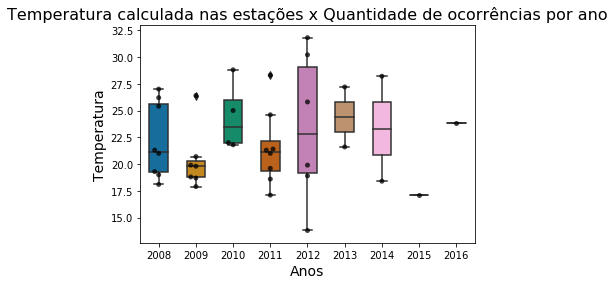

In [0]:
# plot boxplot with seaborn
bplot=sns.boxplot(y='temp', x='yr', 
                 data=tabelao_40, 
                 width=0.5,
                 palette="colorblind")
 
# add swarmplot
bplot=sns.swarmplot(y='temp', x='yr',
              data=tabelao_40, 
              color='black',
              alpha=0.75)

bplot.axes.set_title("Temperatura calculada nas estações x Quantidade de ocorrências por ano",
                    fontsize=16)
 
bplot.set_xlabel("Anos", 
                fontsize=14)
 
bplot.set_ylabel("Temperatura",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

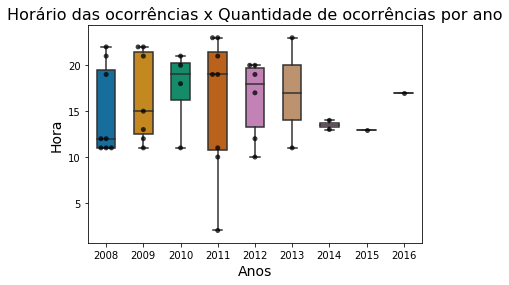

In [0]:
#tabelao_40.ocorrencia_horario_hr.astype('int64')

tabelao_40['ocorrencia_horario_hr']=tabelao_40['ocorrencia_horario_hr'].astype(np.float)

#print(tabelao_40.dtypes)

# plot boxplot with seaborn
bplot=sns.boxplot(y='ocorrencia_horario_hr', x='yr', 
                 data=tabelao_40, 
                 width=0.5,
                 palette="colorblind")
 
# add swarmplot
bplot=sns.swarmplot(y='ocorrencia_horario_hr', x='yr',
              data=tabelao_40, 
              color='black',
              alpha=0.75)

bplot.axes.set_title("Horário das ocorrências x Quantidade de ocorrências por ano",
                    fontsize=16)
 
bplot.set_xlabel("Anos", 
                fontsize=14)
 
bplot.set_ylabel("Hora",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

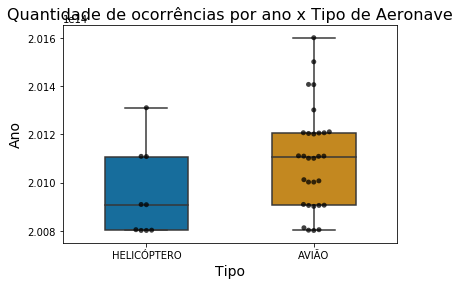

In [0]:
# plot boxplot with seaborn
bplot=sns.boxplot(y='codigo_ocorrencia', x='aeronave_tipo_veiculo', 
                 data=tabelao_40, 
                 width=0.5,
                 palette="colorblind")
 
# add swarmplot
bplot=sns.swarmplot(y='codigo_ocorrencia', x='aeronave_tipo_veiculo',
              data=tabelao_40, 
              color='black',
              alpha=0.75)

bplot.axes.set_title("Quantidade de ocorrências por ano x Tipo de Aeronave",
                    fontsize=16)
 
bplot.set_xlabel("Tipo", 
                fontsize=14)
 
bplot.set_ylabel("Ano",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

In [0]:
df_fatores_contribuintes_completa = pd.read_csv('gdrive/My Drive/projetos/lp/ftc.csv', sep='~', header=0)

tabelao_40_fatores = pd.merge(tabelao_40, df_fatores_contribuintes_completa, on=['codigo_ocorrencia'])

print(tabelao_40_fatores.head(5))

tabelao_40_fatores.to_csv ('gdrive/My Drive/projetos/lp/tabela_40_fatores.csv', index = None, header=True)

sns.set(color_codes=True)


   codigo_ocorrencia  ... fator_dia_extracao
0    200801159627220  ...         2019-01-30
1    200801159627220  ...         2019-01-30
2    200801159627220  ...         2019-01-30
3    200801159627220  ...         2019-01-30
4    200801159627220  ...         2019-01-30

[5 rows x 46 columns]


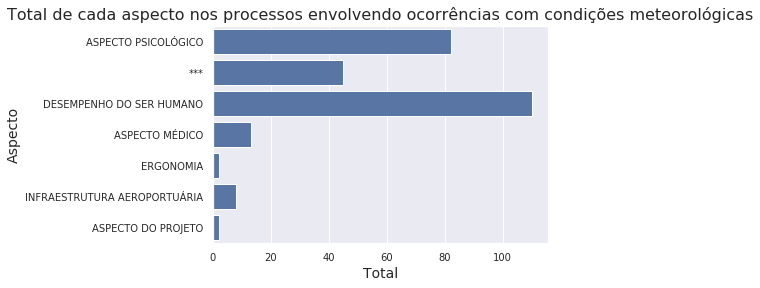

In [0]:
bplot=sns.countplot(y="fator_aspecto", data=tabelao_40_fatores, color="b")

bplot.axes.set_title("Total de cada aspecto nos processos envolvendo ocorrências com condições meteorológicas",
                    fontsize=16)
 
bplot.set_xlabel("Total", 
                fontsize=14)
 
bplot.set_ylabel("Aspecto",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

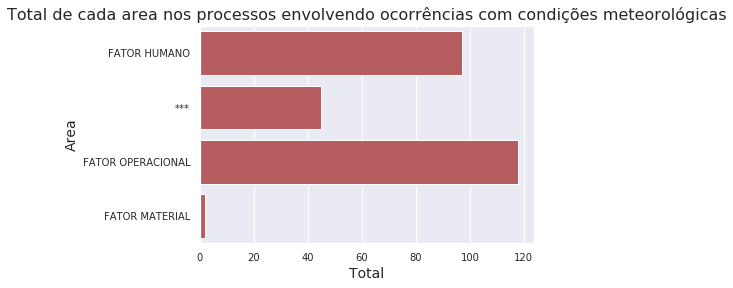

In [0]:
bplot=sns.countplot(y="fator_area", data=tabelao_40_fatores, color="r")

bplot.axes.set_title("Total de cada area nos processos envolvendo ocorrências com condições meteorológicas",
                    fontsize=16)
 
bplot.set_xlabel("Total", 
                fontsize=14)
 
bplot.set_ylabel("Area",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

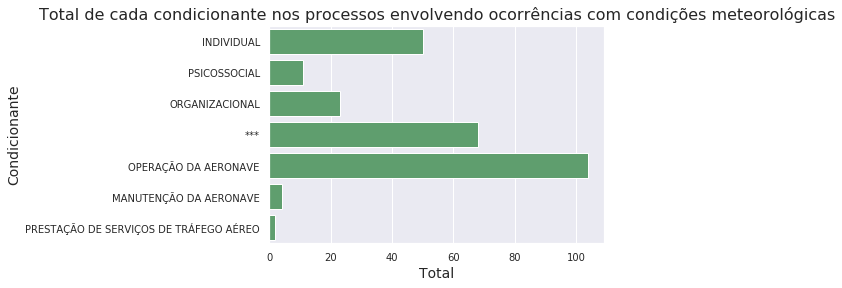

In [0]:
bplot=sns.countplot(y="fator_condicionante", data=tabelao_40_fatores, color="g")

bplot.axes.set_title("Total de cada condicionante nos processos envolvendo ocorrências com condições meteorológicas",
                    fontsize=16)
 
bplot.set_xlabel("Total", 
                fontsize=14)
 
bplot.set_ylabel("Condicionante",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

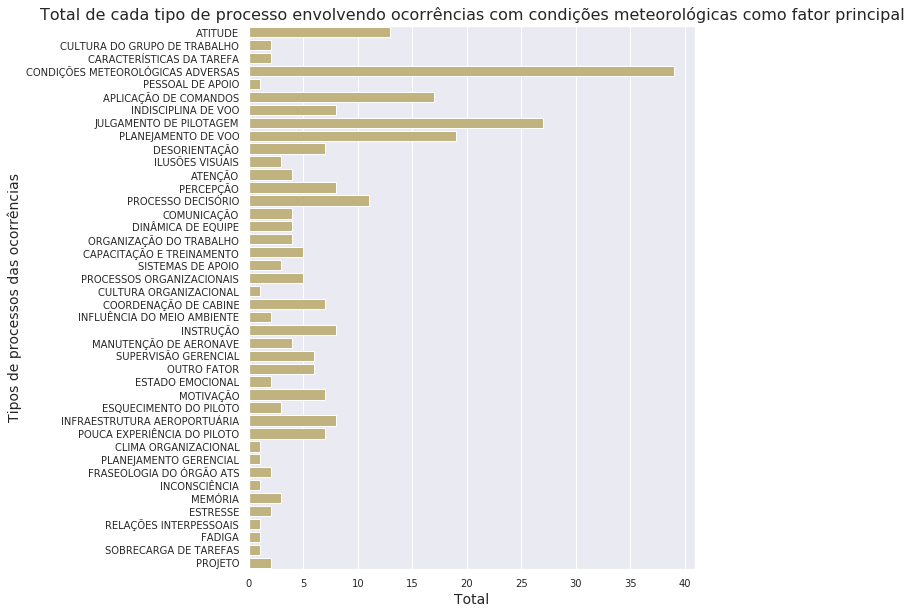

In [0]:
plt.figure(figsize=(8,10)) 

bplot=sns.countplot(y="fator_nome_y", data=tabelao_40_fatores, color="y")


bplot.axes.set_title("Total de cada tipo de processo envolvendo ocorrências com condições meteorológicas como fator principal",
                    fontsize=16)
 
bplot.set_xlabel("Total", 
                fontsize=14)
 
bplot.set_ylabel("Tipos de processos das ocorrências",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

plt.show()

# Análise dos fatores condicionantes das ocorrências nas regiões Norte, Nordeste, Centro-Oeste, Sudeste e Sul do Brasil

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from math import radians, cos, sin, asin, sqrt

%matplotlib inline

sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(15,10)})

In [0]:
df_ocorrencias = pd.read_csv('gdrive/My Drive/projetos/lp/oco.csv', sep='~', header=0,\
         usecols=['codigo_ocorrencia','ocorrencia_classificacao', 'ocorrencia_tipo', 'ocorrencia_uf',\
                 'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_horario', 'ocorrencia_dia'])

print(df_ocorrencias.shape)
print(df_ocorrencias.head(5))


(5733, 8)
   codigo_ocorrencia ocorrencia_classificacao  ... ocorrencia_dia  ocorrencia_horario
0    201305055424986                 ACIDENTE  ...     2013-05-05            11:00:00
1    201805021421302                INCIDENTE  ...     2018-03-09            22:40:00
2    201605160250139          INCIDENTE GRAVE  ...     2016-05-13            19:19:00
3    201311259977425          INCIDENTE GRAVE  ...     2013-11-25            12:32:00
4    200808073991179                 ACIDENTE  ...     2008-08-07            15:10:00

[5 rows x 8 columns]


###Ocorrências por Regiões e Brasil.




In [0]:
df_ocorrencias_brasil = df_ocorrencias

print(df_ocorrencias_brasil.head(5))
print(df_ocorrencias_brasil.shape)

   codigo_ocorrencia ocorrencia_classificacao  ... ocorrencia_dia  ocorrencia_horario
0    201305055424986                 ACIDENTE  ...     2013-05-05            11:00:00
1    201805021421302                INCIDENTE  ...     2018-03-09            22:40:00
2    201605160250139          INCIDENTE GRAVE  ...     2016-05-13            19:19:00
3    201311259977425          INCIDENTE GRAVE  ...     2013-11-25            12:32:00
4    200808073991179                 ACIDENTE  ...     2008-08-07            15:10:00

[5 rows x 8 columns]
(5733, 8)


In [0]:
df_ocorrencias_sudeste = df_ocorrencias.loc[df_ocorrencias['ocorrencia_uf'].isin(['ES','MG','RJ','SP'])]

print(df_ocorrencias_sudeste.head(5))
print(df_ocorrencias_sudeste.shape)

    codigo_ocorrencia  ... ocorrencia_horario
21    201609131430542  ...           14:10:00
22    201212272090341  ...           16:03:00
23    200906128607729  ...           14:50:00
24    201408227604299  ...           14:30:00
25    200801159627220  ...           11:41:00

[5 rows x 8 columns]
(2536, 8)


In [0]:
df_ocorrencias_sul = df_ocorrencias.loc[df_ocorrencias['ocorrencia_uf'].isin(['RS','SC','PR'])]

print(df_ocorrencias_sul.head(5))
print(df_ocorrencias_sul.shape)

     codigo_ocorrencia  ... ocorrencia_horario
10     200912289948837  ...           17:30:00
217    201803091904444  ...           21:30:00
330    201211061877321  ...           21:30:00
366    201310053574855  ...           21:00:00
367    201412231460105  ...           20:00:00

[5 rows x 8 columns]
(997, 8)


In [0]:
df_ocorrencias_nordeste = df_ocorrencias.loc[df_ocorrencias['ocorrencia_uf'].isin(['AL','BA','CE','MA','PB','PE','PI','RN','SE'])]

print(df_ocorrencias_nordeste.head(5))
print(df_ocorrencias_nordeste.shape)

     codigo_ocorrencia  ... ocorrencia_horario
53     201012113981199  ...           11:00:00
235    200903207404883  ...           19:55:00
250    201502161306401  ...           20:38:00
251    201205251709274  ...           20:45:00
301    201812301440298  ...           15:30:00

[5 rows x 8 columns]
(609, 8)


In [0]:
df_ocorrencias_norte = df_ocorrencias.loc[df_ocorrencias['ocorrencia_uf'].isin(['AM','AC','AP','PA','RR','RO','TO'])]

print(df_ocorrencias_norte.head(5))
print(df_ocorrencias_norte.shape)

   codigo_ocorrencia ocorrencia_classificacao  ... ocorrencia_dia  ocorrencia_horario
0    201305055424986                 ACIDENTE  ...     2013-05-05            11:00:00
1    201805021421302                INCIDENTE  ...     2018-03-09            22:40:00
2    201605160250139          INCIDENTE GRAVE  ...     2016-05-13            19:19:00
3    201311259977425          INCIDENTE GRAVE  ...     2013-11-25            12:32:00
4    200808073991179                 ACIDENTE  ...     2008-08-07            15:10:00

[5 rows x 8 columns]
(737, 8)


In [0]:
df_ocorrencias_centro = df_ocorrencias.loc[df_ocorrencias['ocorrencia_uf'].isin(['DF','GO','MT','MS'])]

print(df_ocorrencias_centro.head(5))
print(df_ocorrencias_centro.shape)

    codigo_ocorrencia  ... ocorrencia_horario
11    201211159478138  ...           12:40:00
57    201606221316434  ...           20:30:00
58    200803144023423  ...           16:14:00
59    200912238138403  ...           23:00:00
60    201104187139368  ...           20:30:00

[5 rows x 8 columns]
(851, 8)


###Leitura Fatores Contribuintes

In [0]:
df_fatores_contribuintes = pd.read_csv('gdrive/My Drive/projetos/lp/ftc.csv', sep='~', header=0,\
        usecols=['codigo_ocorrencia', 'fator_nome'])

print(df_fatores_contribuintes.head(5))
print(df_fatores_contribuintes.shape)

   codigo_ocorrencia               fator_nome
0    200801041545367      INDISCIPLINA DE VOO
1    200801041545367                INSTRUÇÃO
2    200801041545367   MANUTENÇÃO DE AERONAVE
3    200801041545367              OUTRO FATOR
4    200801058203864  JULGAMENTO DE PILOTAGEM
(4800, 2)


###Merge das tabelas ocorrencias_regiao com fatores_contribuintes.

In [0]:
df_ocorrencias_fatores_brasil = pd.merge(df_ocorrencias_brasil, df_fatores_contribuintes, on='codigo_ocorrencia')

print(df_ocorrencias_fatores_brasil.head(5))
print(df_ocorrencias_fatores_brasil.shape)

   codigo_ocorrencia  ...               fator_nome
0    201311259977425  ...    COORDENAÇÃO DE CABINE
1    201311259977425  ...   ESQUECIMENTO DO PILOTO
2    200808073991179  ...  JULGAMENTO DE PILOTAGEM
3    200808073991179  ...      INDISCIPLINA DE VOO
4    200808073991179  ...   MANUTENÇÃO DE AERONAVE

[5 rows x 9 columns]
(4799, 9)


In [0]:
df_ocorrencias_fatores_sudeste = pd.merge(df_ocorrencias_sudeste, df_fatores_contribuintes, on='codigo_ocorrencia')

print(df_ocorrencias_fatores_sudeste.head(5))
print(df_ocorrencias_fatores_sudeste.shape)

   codigo_ocorrencia  ...                         fator_nome
0    200801159627220  ...                            ATITUDE
1    200801159627220  ...       CULTURA DO GRUPO DE TRABALHO
2    200801159627220  ...          CARACTERÍSTICAS DA TAREFA
3    200801159627220  ...  CONDIÇÕES METEOROLÓGICAS ADVERSAS
4    200801159627220  ...                   PESSOAL DE APOIO

[5 rows x 9 columns]
(1300, 9)


In [0]:
df_ocorrencias_fatores_sul = pd.merge(df_ocorrencias_sul, df_fatores_contribuintes, on='codigo_ocorrencia')

print(df_ocorrencias_fatores_sul.shape)
print(df_ocorrencias_fatores_sul.head(5))


(1080, 9)
   codigo_ocorrencia  ...                    fator_nome
0    200912289948837  ...       JULGAMENTO DE PILOTAGEM
1    200912289948837  ...                       ATITUDE
2    200912289948837  ...     CARACTERÍSTICAS DA TAREFA
3    200912289948837  ...  CULTURA DO GRUPO DE TRABALHO
4    200912289948837  ...          INFLUÊNCIAS EXTERNAS

[5 rows x 9 columns]


In [0]:
df_ocorrencias_fatores_norte = pd.merge(df_ocorrencias_norte, df_fatores_contribuintes, on='codigo_ocorrencia')

print(df_ocorrencias_fatores_norte.shape)
print(df_ocorrencias_fatores_norte.head(5))


(898, 9)
   codigo_ocorrencia  ...               fator_nome
0    201311259977425  ...    COORDENAÇÃO DE CABINE
1    201311259977425  ...   ESQUECIMENTO DO PILOTO
2    200808073991179  ...  JULGAMENTO DE PILOTAGEM
3    200808073991179  ...      INDISCIPLINA DE VOO
4    200808073991179  ...   MANUTENÇÃO DE AERONAVE

[5 rows x 9 columns]


In [0]:
df_ocorrencias_fatores_nordeste = pd.merge(df_ocorrencias_nordeste, df_fatores_contribuintes, on='codigo_ocorrencia')

print(df_ocorrencias_fatores_nordeste.shape)
print(df_ocorrencias_fatores_nordeste.head(5))

(823, 9)
   codigo_ocorrencia  ...               fator_nome
0    201012113981199  ...   MANUTENÇÃO DE AERONAVE
1    201012113981199  ...     SUPERVISÃO GERENCIAL
2    200903207404883  ...  JULGAMENTO DE PILOTAGEM
3    200903207404883  ...   MANUTENÇÃO DE AERONAVE
4    200903207404883  ...     SUPERVISÃO GERENCIAL

[5 rows x 9 columns]


In [0]:
df_ocorrencias_fatores_centro = pd.merge(df_ocorrencias_centro, df_fatores_contribuintes, on='codigo_ocorrencia')

print(df_ocorrencias_fatores_centro.shape)
print(df_ocorrencias_fatores_centro.head(5))

(695, 9)
   codigo_ocorrencia  ...                    fator_nome
0    201410093482164  ...             SISTEMAS DE APOIO
1    201410093482164  ...              PESSOAL DE APOIO
2    201410093482164  ...  CULTURA DO GRUPO DE TRABALHO
3    201410093482164  ...       ORGANIZAÇÃO DO TRABALHO
4    201410093482164  ...            PROCESSO DECISÓRIO

[5 rows x 9 columns]


###Criação da coluna ano, extraida da coluna ocorrencia_dia.

In [0]:
df_ocorrencias_fatores_brasil.dtypes
df_ocorrencias_fatores_brasil['ocorrencia_dia'] = pd.to_datetime(df_ocorrencias_fatores_brasil.ocorrencia_dia)
df_ocorrencias_fatores_brasil['ano'] = df_ocorrencias_fatores_brasil['ocorrencia_dia'].dt.strftime('%Y')

# df_ocorrencias_fatores_sudeste.dtypes
# df_ocorrencias_fatores_sudeste['ocorrencia_dia'] = pd.to_datetime(df_ocorrencias_fatores_sudeste.ocorrencia_dia)
# df_ocorrencias_fatores_sudeste['ano'] = df_ocorrencias_fatores_sudeste['ocorrencia_dia'].dt.strftime('%Y')

# df_ocorrencias_fatores_sul.dtypes
# df_ocorrencias_fatores_sul['ocorrencia_dia'] = pd.to_datetime(df_ocorrencias_fatores_sudeste.ocorrencia_dia)
# df_ocorrencias_fatores_sul['ano'] = df_ocorrencias_fatores_sudeste['ocorrencia_dia'].dt.strftime('%Y')

# df_ocorrencias_fatores_norte.dtypes
# df_ocorrencias_fatores_norte['ocorrencia_dia'] = pd.to_datetime(df_ocorrencias_fatores_norte.ocorrencia_dia)
# df_ocorrencias_fatores_norte['ano'] = df_ocorrencias_fatores_norte['ocorrencia_dia'].dt.strftime('%Y')

# df_ocorrencias_fatores_nordeste.dtypes
# df_ocorrencias_fatores_nordeste['ocorrencia_dia'] = pd.to_datetime(df_ocorrencias_fatores_nordeste.ocorrencia_dia)
# df_ocorrencias_fatores_nordeste['ano'] = df_ocorrencias_fatores_nordeste['ocorrencia_dia'].dt.strftime('%Y')

# df_ocorrencias_fatores_centro.dtypes
# df_ocorrencias_fatores_centro['ocorrencia_dia'] = pd.to_datetime(df_ocorrencias_fatores_centro.ocorrencia_dia)
# df_ocorrencias_fatores_centro['ano'] = df_ocorrencias_fatores_centro['ocorrencia_dia'].dt.strftime('%Y')

###Distribuição dos fatores no Brasil usando a Regra Pareto.



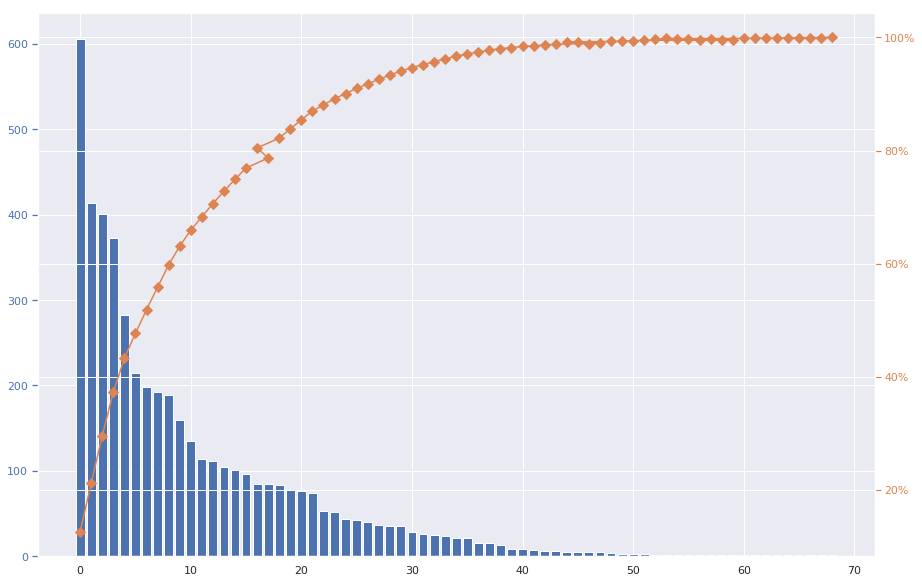

                                   fator_nome  total  cumpercentage
0                     JULGAMENTO DE PILOTAGEM    606      12.627631
1                        SUPERVISÃO GERENCIAL    413      21.233590
2                       APLICAÇÃO DE COMANDOS    401      29.589498
3                         PLANEJAMENTO DE VOO    372      37.341113
4                      MANUTENÇÃO DE AERONAVE    283      43.238175
5                          PROCESSO DECISÓRIO    215      47.718275
6                 POUCA EXPERIÊNCIA DO PILOTO    198      51.844134
7                                     ATITUDE    192      55.844968
8                         INDISCIPLINA DE VOO    189      59.783288
9                                   INSTRUÇÃO    159      63.096478
10          CONDIÇÕES METEOROLÓGICAS ADVERSAS    135      65.909564
11                                  PERCEPÇÃO    114      68.285059
12                      COORDENAÇÃO DE CABINE    112      70.618879
13                  PROCESSOS ORGANIZACIONAIS   

In [0]:
from matplotlib.ticker import PercentFormatter

df_ocorrencias_fatores_brasil_pareto = df_ocorrencias_fatores_brasil.fator_nome.value_counts()

df_ocorrencias_fatores_brasil_pareto = pd.DataFrame({'fator_nome':df_ocorrencias_fatores_brasil_pareto.index, 'total':df_ocorrencias_fatores_brasil_pareto.values})

df_ocorrencias_fatores_brasil_pareto = df_ocorrencias_fatores_brasil_pareto.sort_values(by='total',ascending=False)
df_ocorrencias_fatores_brasil_pareto["cumpercentage"] = df_ocorrencias_fatores_brasil_pareto["total"].cumsum()/df_ocorrencias_fatores_brasil_pareto["total"].sum()*100

fig, ax = plt.subplots()
ax.bar(df_ocorrencias_fatores_brasil_pareto.index, df_ocorrencias_fatores_brasil_pareto["total"], color="C0")
ax2 = ax.twinx()
ax2.plot(df_ocorrencias_fatores_brasil_pareto.index, df_ocorrencias_fatores_brasil_pareto["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

print(df_ocorrencias_fatores_brasil_pareto)

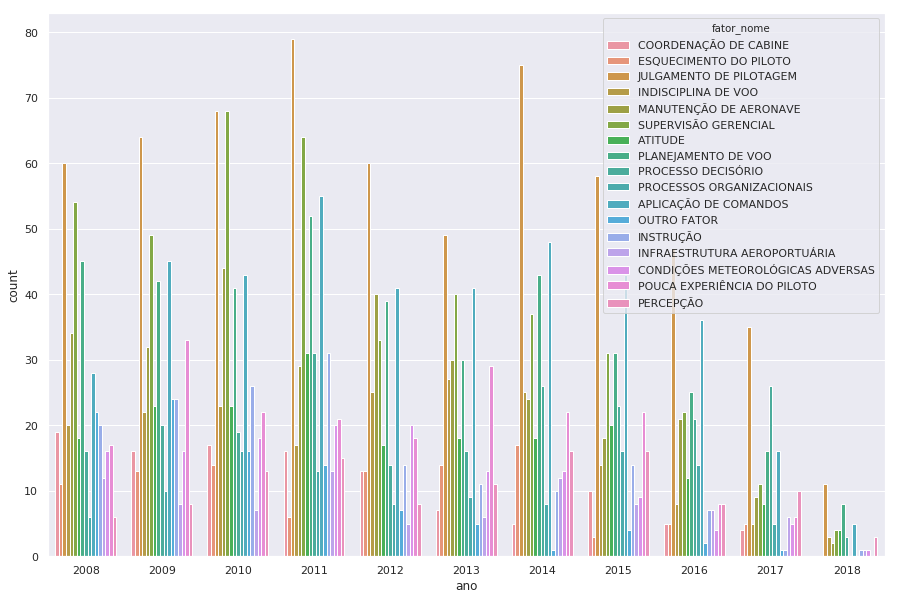

In [0]:
df_ocorrencias_fatores_brasil_top_pareto = df_ocorrencias_fatores_brasil.fator_nome.value_counts().head(17)

df_ocorrencias_fatores_brasil_top_pareto=pd.DataFrame({'fator_nome':df_ocorrencias_fatores_brasil_top_pareto.index, 'total':df_ocorrencias_fatores_brasil_top_pareto.values})

df_ocorrencias_fatores_brasil_filtro_pareto = pd.merge(df_ocorrencias_fatores_brasil, df_ocorrencias_fatores_brasil_top_pareto, on='fator_nome')

ax = sns.countplot(x="ano", hue="fator_nome", data=df_ocorrencias_fatores_brasil_filtro_pareto)

###Distribuição dos fatores no Sudeste usando a Regra Pareto.

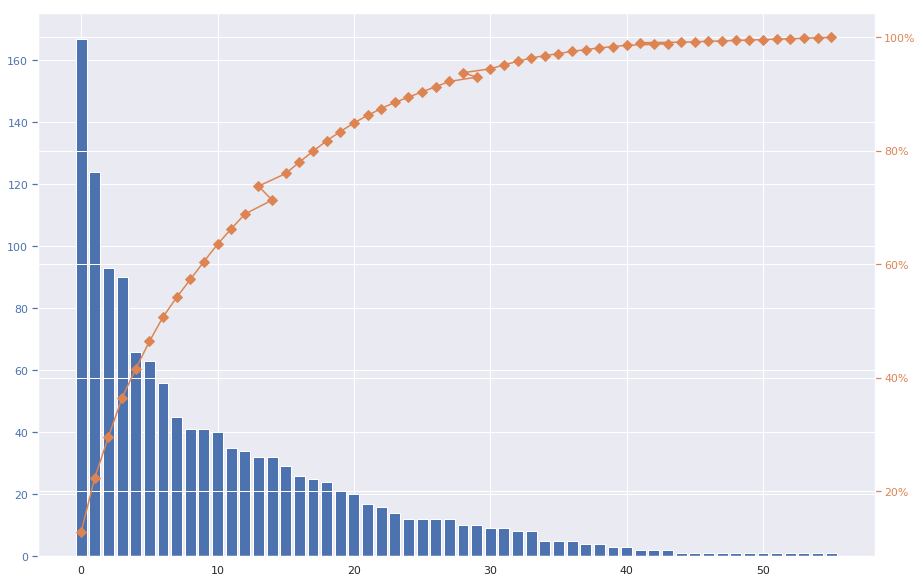

                           fator_nome  total  cumpercentage
0             JULGAMENTO DE PILOTAGEM    167      12.846154
1               APLICAÇÃO DE COMANDOS    124      22.384615
2                SUPERVISÃO GERENCIAL     93      29.538462
3                 PLANEJAMENTO DE VOO     90      36.461538
4         POUCA EXPERIÊNCIA DO PILOTO     66      41.538462
5              MANUTENÇÃO DE AERONAVE     63      46.384615
6                           INSTRUÇÃO     56      50.692308
7                             ATITUDE     45      54.153846
8   CONDIÇÕES METEOROLÓGICAS ADVERSAS     41      57.307692
9               COORDENAÇÃO DE CABINE     41      60.461538
10                 PROCESSO DECISÓRIO     40      63.538462
11                INDISCIPLINA DE VOO     35      66.230769
12             ESQUECIMENTO DO PILOTO     34      68.846154
14          PROCESSOS ORGANIZACIONAIS     32      71.307692
13                        OUTRO FATOR     32      73.769231
15                          PERCEPÇÃO   

In [0]:
from matplotlib.ticker import PercentFormatter

df_ocorrencias_fatores_sudeste_pareto = df_ocorrencias_fatores_sudeste.fator_nome.value_counts()

df_ocorrencias_fatores_sudeste_pareto = pd.DataFrame({'fator_nome':df_ocorrencias_fatores_sudeste_pareto.index, 'total':df_ocorrencias_fatores_sudeste_pareto.values})

df_ocorrencias_fatores_sudeste_pareto = df_ocorrencias_fatores_sudeste_pareto.sort_values(by='total',ascending=False)
df_ocorrencias_fatores_sudeste_pareto["cumpercentage"] = df_ocorrencias_fatores_sudeste_pareto["total"].cumsum()/df_ocorrencias_fatores_sudeste_pareto["total"].sum()*100

fig, ax = plt.subplots()
ax.bar(df_ocorrencias_fatores_sudeste_pareto.index, df_ocorrencias_fatores_sudeste_pareto["total"], color="C0")
ax2 = ax.twinx()
ax2.plot(df_ocorrencias_fatores_sudeste_pareto.index, df_ocorrencias_fatores_sudeste_pareto["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

print(df_ocorrencias_fatores_sudeste_pareto)

In [0]:
df_ocorrencias_fatores_sudeste_top_pareto = df_ocorrencias_fatores_sudeste.fator_nome.value_counts().head(18)

df_ocorrencias_fatores_sudeste_top_pareto=pd.DataFrame({'fator_nome':df_ocorrencias_fatores_sudeste_top_pareto.index, 'total':df_ocorrencias_fatores_sudeste_top_pareto.values})

df_ocorrencias_fatores_sudeste_filtro_pareto = pd.merge(df_ocorrencias_fatores_sudeste, df_ocorrencias_fatores_sudeste_top_pareto, on='fator_nome')

ax = sns.countplot(x="ano", hue="fator_nome", data=df_ocorrencias_fatores_sudeste_filtro_pareto)

###Distribuição dos fatores no Sul usando a Regra Pareto.

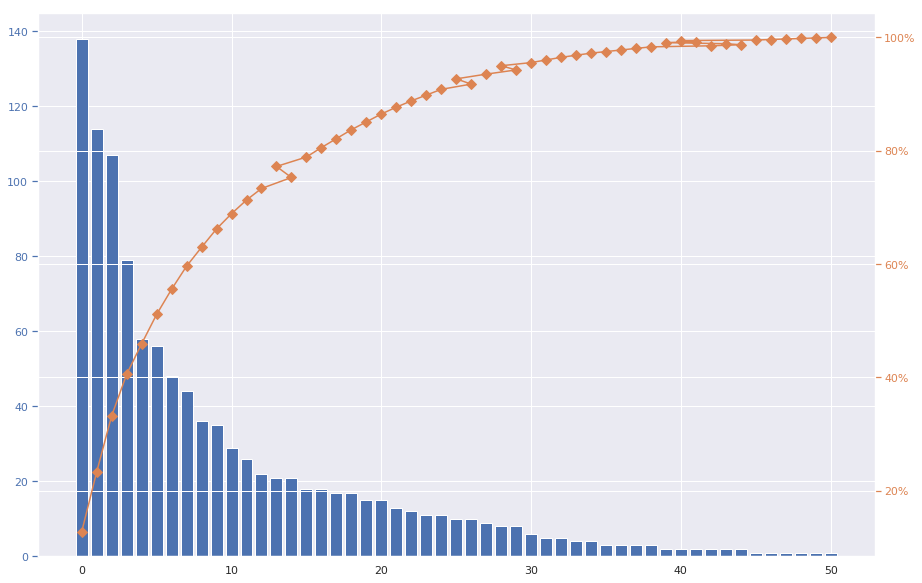

                           fator_nome  total  cumpercentage
0             JULGAMENTO DE PILOTAGEM    138      12.777778
1                SUPERVISÃO GERENCIAL    114      23.333333
2               APLICAÇÃO DE COMANDOS    107      33.240741
3                 PLANEJAMENTO DE VOO     79      40.555556
4              MANUTENÇÃO DE AERONAVE     58      45.925926
5         POUCA EXPERIÊNCIA DO PILOTO     56      51.111111
6                           INSTRUÇÃO     48      55.555556
7                  PROCESSO DECISÓRIO     44      59.629630
8           PROCESSOS ORGANIZACIONAIS     36      62.962963
9                             ATITUDE     35      66.203704
10                INDISCIPLINA DE VOO     29      68.888889
11              COORDENAÇÃO DE CABINE     26      71.296296
12             PLANEJAMENTO GERENCIAL     22      73.333333
14  CONDIÇÕES METEOROLÓGICAS ADVERSAS     21      75.277778
13                          PERCEPÇÃO     21      77.222222
15          CAPACITAÇÃO E TREINAMENTO   

In [0]:
from matplotlib.ticker import PercentFormatter

df_ocorrencias_fatores_sul_pareto = df_ocorrencias_fatores_sul.fator_nome.value_counts()

df_ocorrencias_fatores_sul_pareto = pd.DataFrame({'fator_nome':df_ocorrencias_fatores_sul_pareto.index, 'total':df_ocorrencias_fatores_sul_pareto.values})

df_ocorrencias_fatores_sul_pareto = df_ocorrencias_fatores_sul_pareto.sort_values(by='total',ascending=False)
df_ocorrencias_fatores_sul_pareto["cumpercentage"] = df_ocorrencias_fatores_sul_pareto["total"].cumsum()/df_ocorrencias_fatores_sul_pareto["total"].sum()*100


fig, ax = plt.subplots()
ax.bar(df_ocorrencias_fatores_sul_pareto.index, df_ocorrencias_fatores_sul_pareto["total"], color="C0")
ax2 = ax.twinx()
ax2.plot(df_ocorrencias_fatores_sul_pareto.index, df_ocorrencias_fatores_sul_pareto["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

print(df_ocorrencias_fatores_sul_pareto)

In [0]:
df_ocorrencias_fatores_sul_top_pareto = df_ocorrencias_fatores_sul.fator_nome.value_counts().head(17)

df_ocorrencias_fatores_sul_top_pareto = pd.DataFrame({'fator_nome':df_ocorrencias_fatores_sul_top_pareto.index, 'total':df_ocorrencias_fatores_sul_top_pareto.values})

df_ocorrencias_fatores_sul_filtro_pareto = pd.merge(df_ocorrencias_fatores_sul, df_ocorrencias_fatores_sul_top_pareto, on='fator_nome')

ax = sns.countplot(x="ano", hue="fator_nome", data=df_ocorrencias_fatores_sul_filtro_pareto)

###Distribuição dos fatores no Norte usando a Regra Pareto.

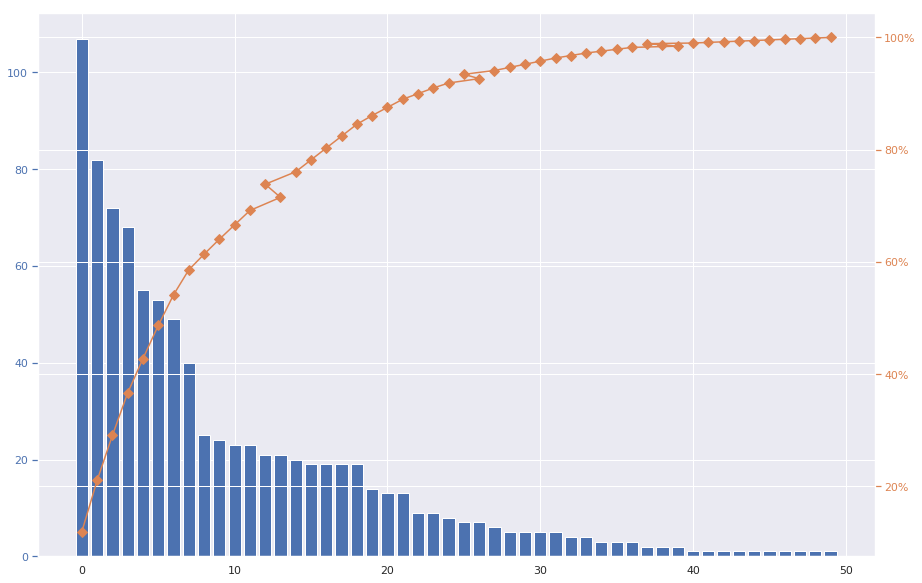

                                   fator_nome  total  cumpercentage
0                     JULGAMENTO DE PILOTAGEM    107      11.915367
1                        SUPERVISÃO GERENCIAL     82      21.046771
2                         PLANEJAMENTO DE VOO     72      29.064588
3                      MANUTENÇÃO DE AERONAVE     68      36.636971
4                          PROCESSO DECISÓRIO     55      42.761693
5                       APLICAÇÃO DE COMANDOS     53      48.663697
6                         INDISCIPLINA DE VOO     49      54.120267
7                                     ATITUDE     40      58.574610
8                                   INSTRUÇÃO     25      61.358575
9           CONDIÇÕES METEOROLÓGICAS ADVERSAS     24      64.031180
10                     CULTURA ORGANIZACIONAL     23      66.592428
11               INFRAESTRUTURA AEROPORTUÁRIA     23      69.153675
13                      COORDENAÇÃO DE CABINE     21      71.492205
12                POUCA EXPERIÊNCIA DO PILOTO   

In [0]:
from matplotlib.ticker import PercentFormatter

df_ocorrencias_fatores_norte_pareto = df_ocorrencias_fatores_norte.fator_nome.value_counts()

df_ocorrencias_fatores_norte_pareto = pd.DataFrame({'fator_nome':df_ocorrencias_fatores_norte_pareto.index, 'total':df_ocorrencias_fatores_norte_pareto.values})

df_ocorrencias_fatores_norte_pareto = df_ocorrencias_fatores_norte_pareto.sort_values(by='total',ascending=False)
df_ocorrencias_fatores_norte_pareto["cumpercentage"] = df_ocorrencias_fatores_norte_pareto["total"].cumsum()/df_ocorrencias_fatores_norte_pareto["total"].sum()*100


fig, ax = plt.subplots()
ax.bar(df_ocorrencias_fatores_norte_pareto.index, df_ocorrencias_fatores_norte_pareto["total"], color="C0")
ax2 = ax.twinx()
ax2.plot(df_ocorrencias_fatores_norte_pareto.index, df_ocorrencias_fatores_norte_pareto["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

print(df_ocorrencias_fatores_norte_pareto)

In [0]:
df_ocorrencias_fatores_norte_top_pareto = df_ocorrencias_fatores_norte.fator_nome.value_counts().head(17)

df_ocorrencias_fatores_norte_top_pareto=pd.DataFrame({'fator_nome':df_ocorrencias_fatores_norte_top_pareto.index, 'total':df_ocorrencias_fatores_norte_top_pareto.values})

df_ocorrencias_fatores_norte_filtro_pareto = pd.merge(df_ocorrencias_fatores_norte, df_ocorrencias_fatores_norte_top_pareto, on='fator_nome')

ax = sns.countplot(x="ano", hue="fator_nome", data=df_ocorrencias_fatores_norte_filtro_pareto)

###Distribuição dos fatores no Nordeste usando a Regra Pareto.

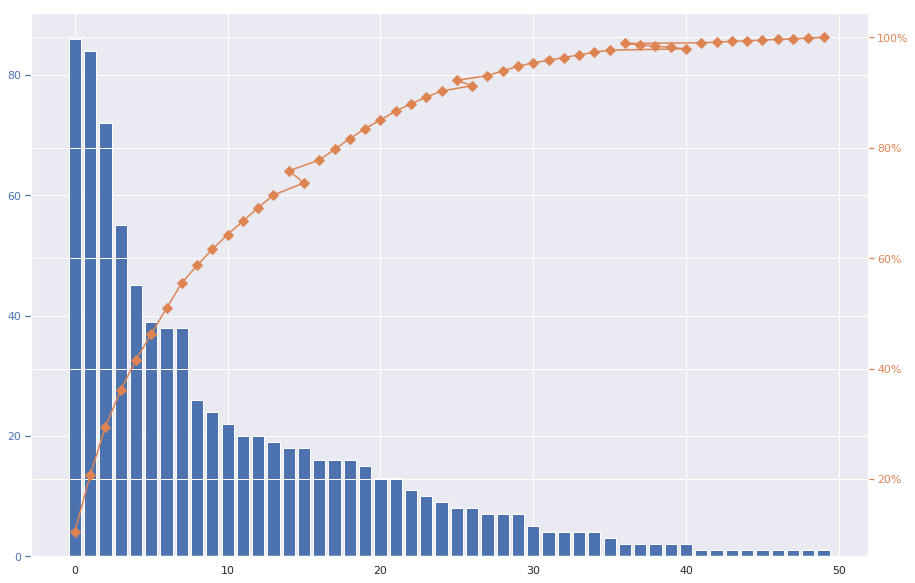

                           fator_nome  total  cumpercentage
0             JULGAMENTO DE PILOTAGEM     86      10.449575
1                SUPERVISÃO GERENCIAL     84      20.656136
2                 PLANEJAMENTO DE VOO     72      29.404617
3               APLICAÇÃO DE COMANDOS     55      36.087485
4              MANUTENÇÃO DE AERONAVE     45      41.555286
5                  PROCESSO DECISÓRIO     39      46.294046
6                 INDISCIPLINA DE VOO     38      50.911300
7                             ATITUDE     38      55.528554
8         POUCA EXPERIÊNCIA DO PILOTO     26      58.687728
9                           PERCEPÇÃO     24      61.603888
10                          INSTRUÇÃO     22      64.277035
11                          MOTIVAÇÃO     20      66.707169
12                        OUTRO FATOR     20      69.137303
13             PLANEJAMENTO GERENCIAL     19      71.445930
15          PROCESSOS ORGANIZACIONAIS     18      73.633050
14  CONDIÇÕES METEOROLÓGICAS ADVERSAS   

In [0]:
from matplotlib.ticker import PercentFormatter

df_ocorrencias_fatores_nordeste_pareto = df_ocorrencias_fatores_nordeste.fator_nome.value_counts()

df_ocorrencias_fatores_nordeste_pareto = pd.DataFrame({'fator_nome':df_ocorrencias_fatores_nordeste_pareto.index, 'total':df_ocorrencias_fatores_nordeste_pareto.values})

df_ocorrencias_fatores_nordeste_pareto = df_ocorrencias_fatores_nordeste_pareto.sort_values(by='total',ascending=False)
df_ocorrencias_fatores_nordeste_pareto["cumpercentage"] = df_ocorrencias_fatores_nordeste_pareto["total"].cumsum()/df_ocorrencias_fatores_nordeste_pareto["total"].sum()*100


fig, ax = plt.subplots()
ax.bar(df_ocorrencias_fatores_nordeste_pareto.index, df_ocorrencias_fatores_nordeste_pareto["total"], color="C0")
ax2 = ax.twinx()
ax2.plot(df_ocorrencias_fatores_nordeste_pareto.index, df_ocorrencias_fatores_nordeste_pareto["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

print(df_ocorrencias_fatores_nordeste_pareto)

In [0]:
df_ocorrencias_fatores_nordeste_top_pareto = df_ocorrencias_fatores_nordeste.fator_nome.value_counts().head(18)

df_ocorrencias_fatores_nordeste_top_pareto=pd.DataFrame({'fator_nome':df_ocorrencias_fatores_nordeste_top_pareto.index, 'total':df_ocorrencias_fatores_nordeste_top_pareto.values})

df_ocorrencias_fatores_nordeste_filtro_pareto = pd.merge(df_ocorrencias_fatores_nordeste, df_ocorrencias_fatores_nordeste_top_pareto, on='fator_nome')

ax = sns.countplot(x="ano", hue="fator_nome", data=df_ocorrencias_fatores_nordeste_filtro_pareto)

###Distribuição dos fatores no Centro-Oeste usando a Regra Pareto.

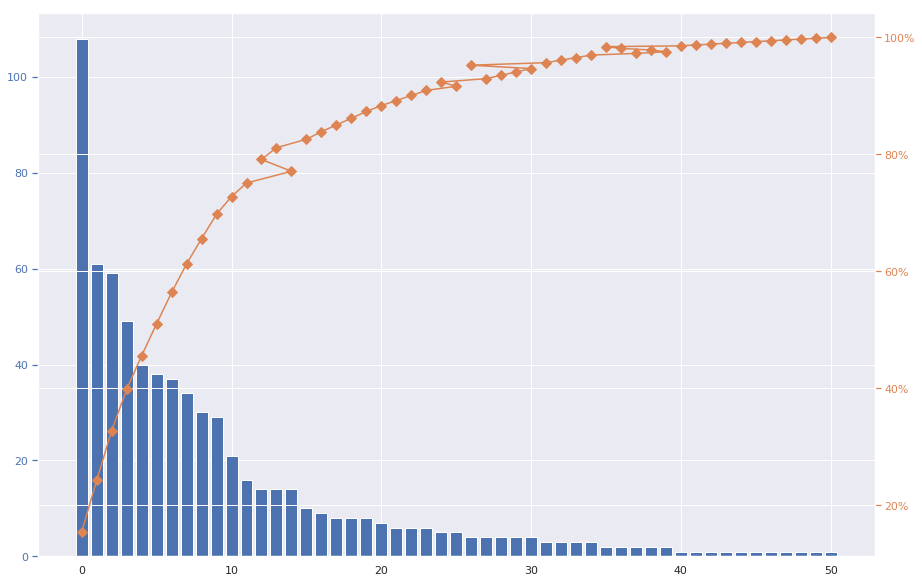

                                   fator_nome  total  cumpercentage
0                     JULGAMENTO DE PILOTAGEM    108      15.539568
1                       APLICAÇÃO DE COMANDOS     61      24.316547
2                         PLANEJAMENTO DE VOO     59      32.805755
3                      MANUTENÇÃO DE AERONAVE     49      39.856115
4                        SUPERVISÃO GERENCIAL     40      45.611511
5                         INDISCIPLINA DE VOO     38      51.079137
6                          PROCESSO DECISÓRIO     37      56.402878
7                                     ATITUDE     34      61.294964
8           CONDIÇÕES METEOROLÓGICAS ADVERSAS     30      65.611511
9                 POUCA EXPERIÊNCIA DO PILOTO     29      69.784173
10                                  PERCEPÇÃO     21      72.805755
11                     ESQUECIMENTO DO PILOTO     16      75.107914
14                                    ATENÇÃO     14      77.122302
12               INFRAESTRUTURA AEROPORTUÁRIA   

In [0]:
from matplotlib.ticker import PercentFormatter

df_ocorrencias_fatores_centro_pareto = df_ocorrencias_fatores_centro.fator_nome.value_counts()

df_ocorrencias_fatores_centro_pareto = pd.DataFrame({'fator_nome':df_ocorrencias_fatores_centro_pareto.index, 'total':df_ocorrencias_fatores_centro_pareto.values})

df_ocorrencias_fatores_centro_pareto = df_ocorrencias_fatores_centro_pareto.sort_values(by='total',ascending=False)
df_ocorrencias_fatores_centro_pareto["cumpercentage"] = df_ocorrencias_fatores_centro_pareto["total"].cumsum()/df_ocorrencias_fatores_centro_pareto["total"].sum()*100


fig, ax = plt.subplots()
ax.bar(df_ocorrencias_fatores_centro_pareto.index, df_ocorrencias_fatores_centro_pareto["total"], color="C0")
ax2 = ax.twinx()
ax2.plot(df_ocorrencias_fatores_centro_pareto.index, df_ocorrencias_fatores_centro_pareto["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

print(df_ocorrencias_fatores_centro_pareto)

In [0]:
df_ocorrencias_fatores_centro_top_pareto = df_ocorrencias_fatores_centro.fator_nome.value_counts().head(13)

df_ocorrencias_fatores_centro_top_pareto=pd.DataFrame({'fator_nome':df_ocorrencias_fatores_centro_top_pareto.index, 'total':df_ocorrencias_fatores_centro_top_pareto.values})

df_ocorrencias_fatores_centro_filtro_pareto = pd.merge(df_ocorrencias_fatores_centro, df_ocorrencias_fatores_centro_top_pareto, on='fator_nome')

ax = sns.countplot(x="ano", hue="fator_nome", data=df_ocorrencias_fatores_centro_filtro_pareto)